In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/enter-dataset-title/gender_classification_v7.csv
/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv
/kaggle/input/datatechcareerhw2/cap_data_github.csv
/kaggle/input/age-and-gender-estimation-using-cnn/__results__.html
/kaggle/input/age-and-gender-estimation-using-cnn/data.h5
/kaggle/input/age-and-gender-estimation-using-cnn/__resultx__.html
/kaggle/input/age-and-gender-estimation-using-cnn/__notebook__.ipynb
/kaggle/input/age-and-gender-estimation-using-cnn/__output__.json
/kaggle/input/age-and-gender-estimation-using-cnn/custom.css
/kaggle/input/age-and-gender-estimation-using-cnn/__results___files/__results___17_8.png
/kaggle/input/age-and-gender-estimation-using-cnn/__results___files/__results___16_0.png
/kaggle/input/age-and-gender-estimation-using-cnn/__results___files/__results___17_10.png
/kaggle/input/age-and-gender-estimation-using-cnn/__results___files/__results___17_14.png
/kaggle/input/age-and-gender-estimation-using-cnn/__results___files/_

In [34]:
import pandas as pd
import numpy as np

In [35]:
gender1 = pd.read_csv('/kaggle/input/enter-dataset-title/gender_classification_v7.csv')
gender1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [36]:
gender1.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [37]:
gender1.shape

(5001, 8)

In [38]:
gender1.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [39]:
X = gender1.drop(['gender'], axis=1)
y = gender1['gender']

In [40]:
X
y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object

In [41]:
from sklearn.model_selection import train_test_split
train_gender1,test_gender=train_test_split(gender1,test_size=0.2, random_state=1)
print(f"Length of train ataset = {train_gender1.shape[0]}")
print(f"Length of test dataset = {test_gender.shape[0]}")



Length of train ataset = 4000
Length of test dataset = 1001


In [42]:
y_train=train_gender1['gender']
X_train=train_gender1.drop(['gender'],axis=1)


In [43]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model=model.fit(X_train,y_train)

feature_names=train_gender1.drop(['gender'],axis=1).columns
class_names=['Male','Female']



In [44]:
X_test=gender1.drop(['gender'],axis=1)
y_test=gender1['gender']
y_pred=model.predict(X_test)
y_pred


array(['Male', 'Female', 'Male', ..., 'Female', 'Female', 'Male'],
      dtype=object)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Model Test Accuracy : {0:0.7f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.7f}".format(accuracy_score(y_train,y_pred_train)))


Model Test Accuracy : 0.9924015
Model Train Accuracy : 0.9990000


In [46]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion Matrix

 [[2485   16]
 [  22 2478]]

True Positives(TP) =  2485

True Negatives(TN) =  2478

False Positives(FP) =  16

False Negatives(FN) =  22


              precision    recall  f1-score   support

      Female       0.99      0.99      0.99      2501
        Male       0.99      0.99      0.99      2500

    accuracy                           0.99      5001
   macro avg       0.99      0.99      0.99      5001
weighted avg       0.99      0.99      0.99      5001



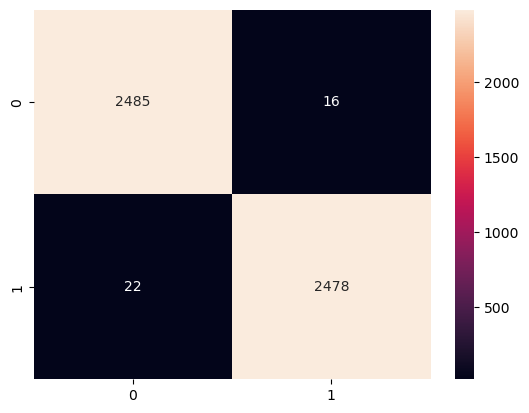

In [47]:
import seaborn as sns
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

print(classification_report(y_test,y_pred))

